In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from google.colab import files
files = files.upload()

Saving GenerativeAIUseSurvey.csv to GenerativeAIUseSurvey.csv


In [235]:
df = pd.read_csv('GenerativeAIUseSurvey.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Timestamp                         30 non-null     object
 1   Gender                            30 non-null     object
 2   Frequency of use                  30 non-null     object
 3   percieved generative AI accuracy  30 non-null     int64 
 4   Reliance on AI tools              30 non-null     object
 5   Level of study                    30 non-null     object
 6   Creative tasks                    30 non-null     int64 
 7   Problem solving influence         30 non-null     object
 8   Innovative solutions              30 non-null     object
 9   Confidence without AI             30 non-null     int64 
dtypes: int64(3), object(7)
memory usage: 2.5+ KB
None


In [234]:
df.head()


,Gender,Frequency of use,percieved generative AI accuracy,Reliance on AI tools,Level of study,Creative tasks,Problem solving influence,Innovative solutions,Confidence without AI
0,Male,Always (everyday ),4,Heavily,Sophomore,4,"Somewhat Expanded (AI gives hints, but I still...",Somewhat enhanced,3
1,Female,Always (everyday ),3,Heavily,Sophomore,4,"Somewhat Expanded (AI gives hints, but I still...",Somewhat enhanced,2
2,Male,Always (everyday ),4,Moderately,Sophomore,4,Strongly Expanded (AI introduces new approache...,Somewhat enhanced,3
3,Male,Always (everyday ),4,Heavily,Sophomore,4,Strongly Expanded (AI introduces new approache...,Somewhat enhanced,1
4,Male,Always (everyday ),3,Moderately,Sophomore,2,"Somewhat Expanded (AI gives hints, but I still...",Somewhat enhanced,2


In [236]:
df.isnull().sum()
df.isna().any()
df = df.drop('Timestamp', axis=1)
df.dropna()


,Gender,Frequency of use,percieved generative AI accuracy,Reliance on AI tools,Level of study,Creative tasks,Problem solving influence,Innovative solutions,Confidence without AI
0,Male,Always (everyday ),4,Heavily,Sophomore,4,"Somewhat Expanded (AI gives hints, but I still...",Somewhat enhanced,3
1,Female,Always (everyday ),3,Heavily,Sophomore,4,"Somewhat Expanded (AI gives hints, but I still...",Somewhat enhanced,2
2,Male,Always (everyday ),4,Moderately,Sophomore,4,Strongly Expanded (AI introduces new approache...,Somewhat enhanced,3
3,Male,Always (everyday ),4,Heavily,Sophomore,4,Strongly Expanded (AI introduces new approache...,Somewhat enhanced,1
4,Male,Always (everyday ),3,Moderately,Sophomore,2,"Somewhat Expanded (AI gives hints, but I still...",Somewhat enhanced,2
5,Male,Often (3-5 times a week),3,Moderately,Sophomore,2,"Somewhat Expanded (AI gives hints, but I still...",Somewhat enhanced,3
6,Female,Often (3-5 times a week),3,Moderately,Freshman,2,Strongly Expanded (AI introduces new approache...,Somewhat enhanced,2
7,Male,Always (everyday ),4,Moderately,Sophomore,4,Strongly Expanded (AI introduces new approache...,Strongly enhanced,2
8,Male,Rarely (3-4 times a month),2,Moderately,Junior,3,"Somewhat reduces (I rely on AI more, thinking ...",Somewhat reduced,3
9,Female,Often (3-5 times a week),3,Moderately,Sophomore,2,"Somewhat Expanded (AI gives hints, but I still...",Somewhat enhanced,4


In [237]:

numeric_cols = ['percieved generative AI accuracy', 'Creative tasks', 'Confidence without AI']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


print(df[numeric_cols].describe())

       percieved generative AI accuracy  Creative tasks  Confidence without AI
count                         30.000000       30.000000              30.000000
mean                           3.533333        3.333333               2.933333
std                            0.819307        0.994236               1.112107
min                            2.000000        2.000000               1.000000
25%                            3.000000        2.250000               2.000000
50%                            4.000000        3.500000               3.000000
75%                            4.000000        4.000000               4.000000
max                            5.000000        5.000000               5.000000


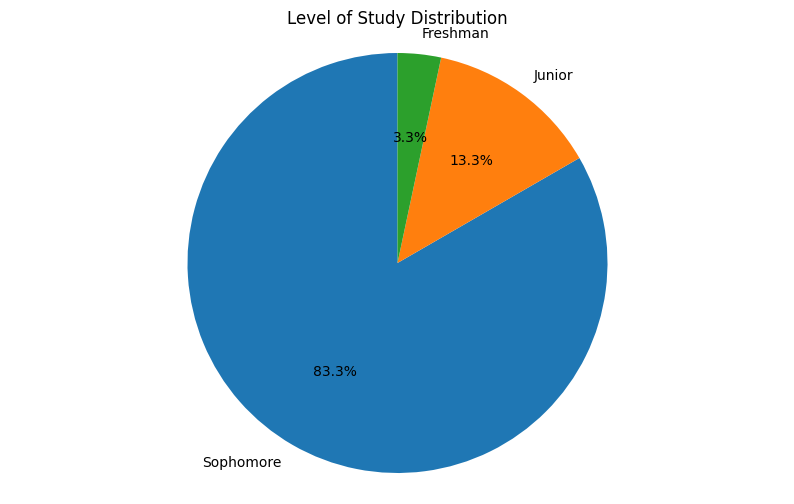

In [257]:

level_of_study_counts = df['Level of study'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(level_of_study_counts, labels=level_of_study_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Level of Study Distribution')
plt.axis('equal')
plt.show()


<ipython-input-238-d245b8e1fa66>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Frequency of use',order = order,palette='viridis')


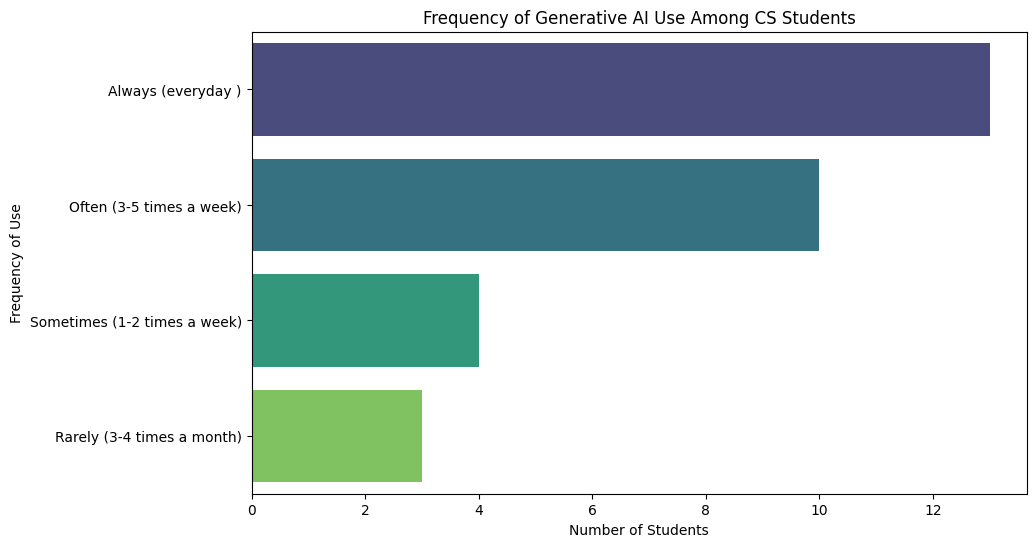

In [238]:
order = df['Frequency of use'].value_counts().index
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Frequency of use',order = order,palette='viridis')
plt.title('Frequency of Generative AI Use Among CS Students')
plt.xlabel('Number of Students')
plt.ylabel('Frequency of Use')
plt.show()

<ipython-input-239-37ddd949cc84>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='percieved generative AI accuracy' ,palette='viridis')


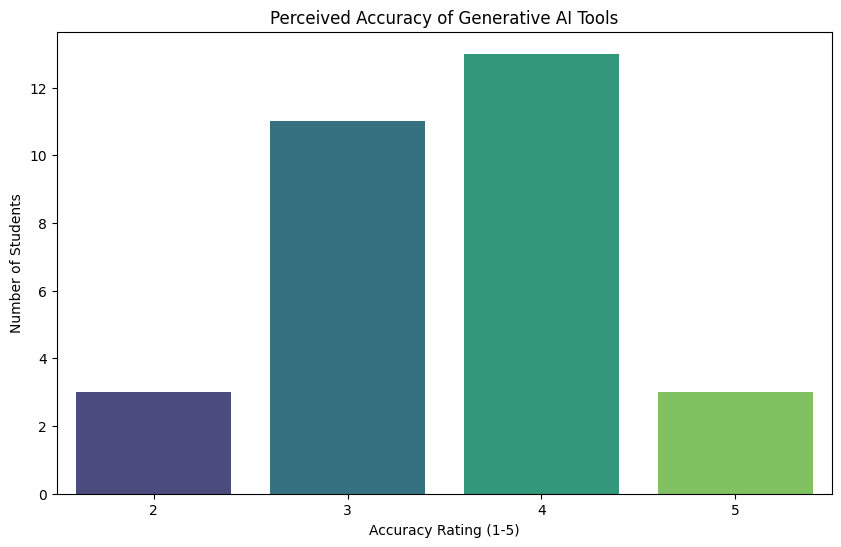

In [239]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='percieved generative AI accuracy' ,palette='viridis')
plt.title('Perceived Accuracy of Generative AI Tools')
plt.xlabel('Accuracy Rating (1-5)')
plt.ylabel('Number of Students')

plt.show()

<ipython-input-240-98263bbd477f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Reliance on AI tools' ,palette='viridis')


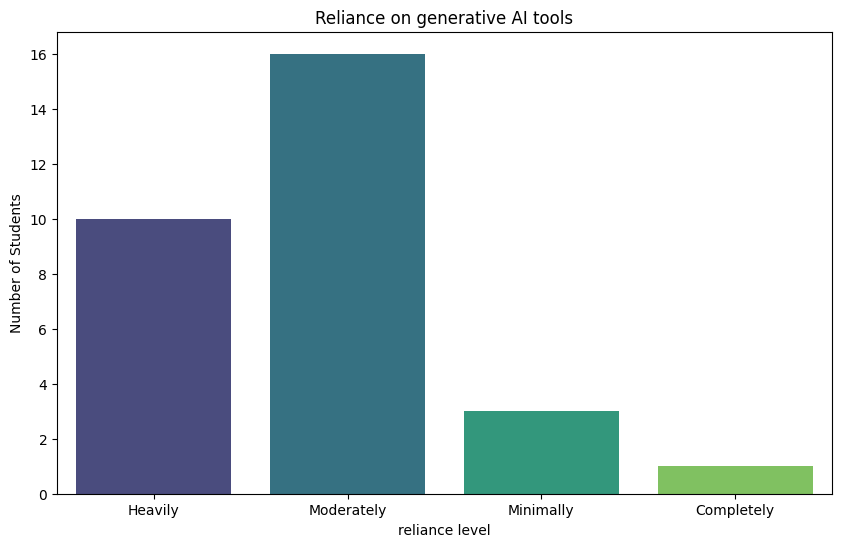

In [240]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='Reliance on AI tools' ,palette='viridis')
plt.title('Reliance on generative AI tools')
plt.xlabel('reliance level')
plt.ylabel('Number of Students')

plt.show()

<ipython-input-241-c8b71c7fecb6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df,x='Innovative solutions', palette='viridis',order = order)


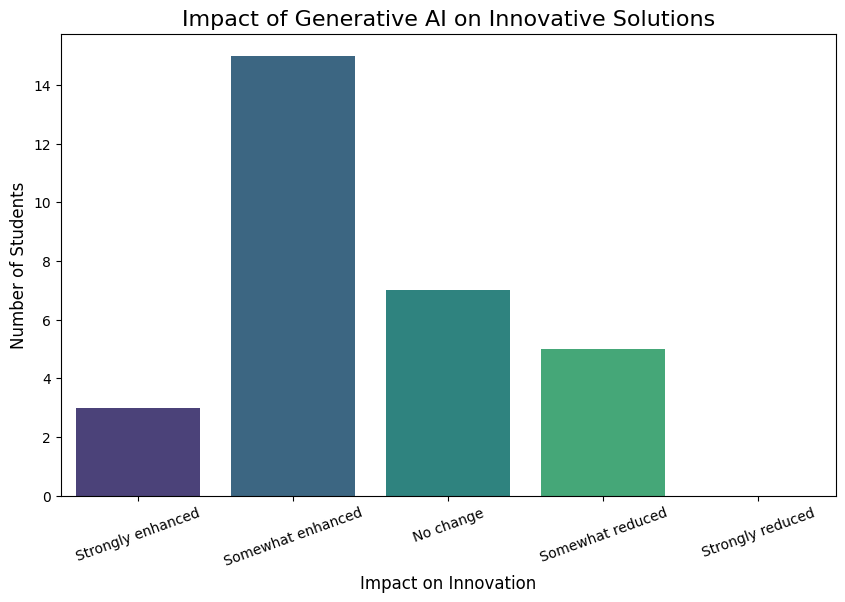

In [241]:
plt.figure(figsize=(10, 6))
order = ['Strongly enhanced','Somewhat enhanced','No change','Somewhat reduced','Strongly reduced']
sns.countplot(data = df,x='Innovative solutions', palette='viridis',order = order)
plt.title('Impact of Generative AI on Innovative Solutions', fontsize=16)
plt.xlabel('Impact on Innovation', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=20)

plt.show()

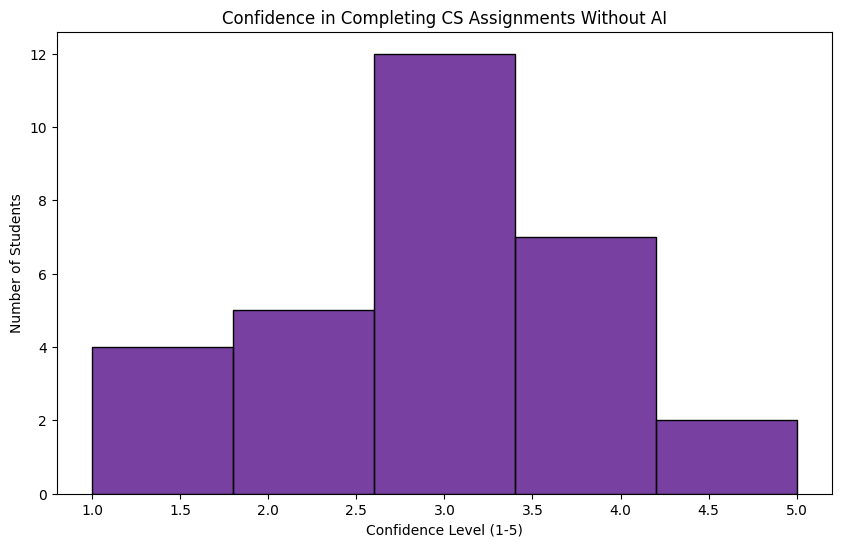

In [242]:
plt.figure(figsize=(10, 6))

sns.histplot(data = df,x='Confidence without AI',bins = 5, color = 'indigo')
plt.title('Confidence in Completing CS Assignments Without AI')
plt.xlabel('Confidence Level (1-5)')
plt.ylabel('Number of Students')
plt.show()

<ipython-input-243-23ec40f1252f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=creative_counts.index, y=creative_counts.values, palette='viridis',order=[1,2,3,4,5])


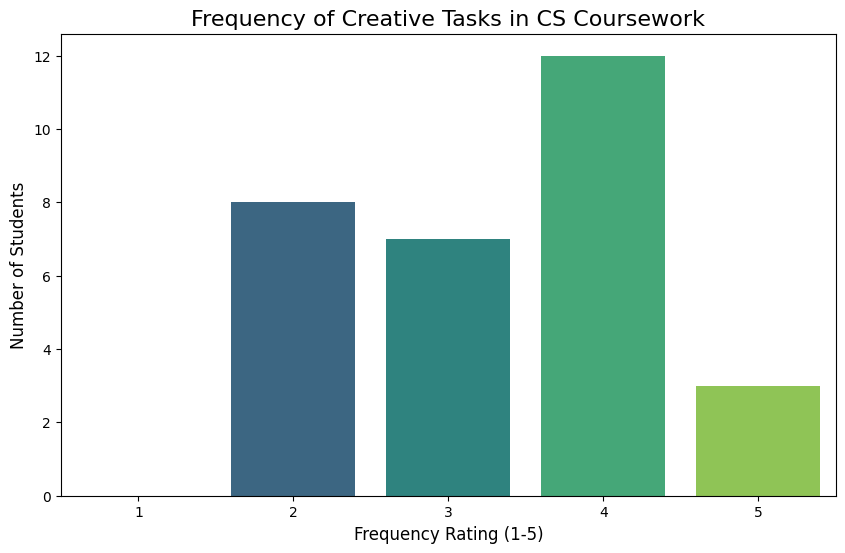

In [243]:
plt.figure(figsize=(10, 6))
creative_counts = df['Creative tasks'].value_counts().sort_index()
sns.barplot(x=creative_counts.index, y=creative_counts.values, palette='viridis',order=[1,2,3,4,5])
plt.title('Frequency of Creative Tasks in CS Coursework', fontsize=16)
plt.xlabel('Frequency Rating (1-5)', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.show()

In [244]:
problem_solving_map = {
    'Strongly reduces (Heavy AI dependence has reduced my originality)': 1,
    'Somewhat reduces (I rely on AI more, thinking less on my own)': 2,
    'No change (My problem-solving process remains the same)': 3,
    'Somewhat Expanded (AI gives hints, but I still think independently)': 4,
    'Strongly Expanded (AI introduces new approaches and enhances creativity)': 5
}

df['Problem_solving_numeric'] = df['Problem solving influence'].map(problem_solving_map)
df.head()

,Gender,Frequency of use,percieved generative AI accuracy,Reliance on AI tools,Level of study,Creative tasks,Problem solving influence,Innovative solutions,Confidence without AI,Problem_solving_numeric
0,Male,Always (everyday ),4,Heavily,Sophomore,4,"Somewhat Expanded (AI gives hints, but I still...",Somewhat enhanced,3,4
1,Female,Always (everyday ),3,Heavily,Sophomore,4,"Somewhat Expanded (AI gives hints, but I still...",Somewhat enhanced,2,4
2,Male,Always (everyday ),4,Moderately,Sophomore,4,Strongly Expanded (AI introduces new approache...,Somewhat enhanced,3,5
3,Male,Always (everyday ),4,Heavily,Sophomore,4,Strongly Expanded (AI introduces new approache...,Somewhat enhanced,1,5
4,Male,Always (everyday ),3,Moderately,Sophomore,2,"Somewhat Expanded (AI gives hints, but I still...",Somewhat enhanced,2,4


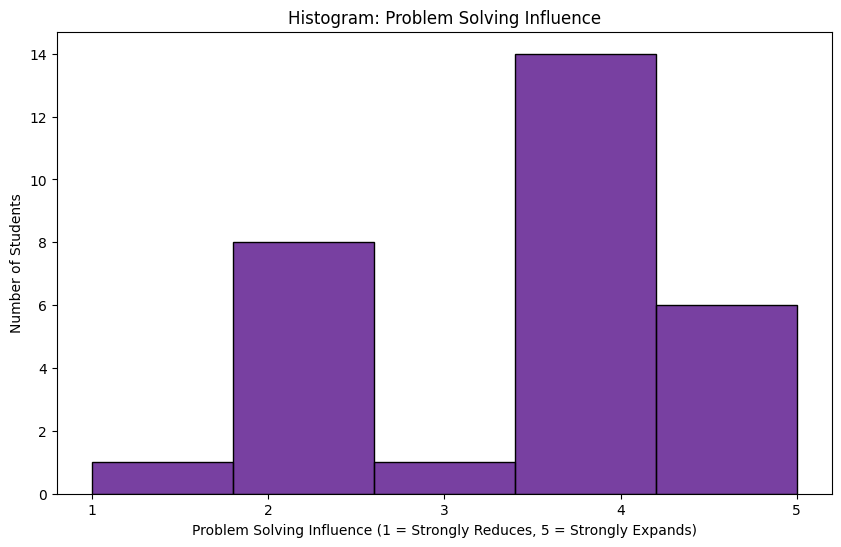

In [247]:
plt.figure(figsize=(10, 6))
sns.histplot(data = df, x ='Problem_solving_numeric',bins = 5,color= 'indigo')
plt.title('Histogram: Problem Solving Influence')
plt.xlabel('Problem Solving Influence (1 = Strongly Reduces, 5 = Strongly Expands)')
plt.ylabel('Number of Students')
plt.xticks([1, 2, 3, 4, 5])  # Set exact ticks for clarity
plt.show()

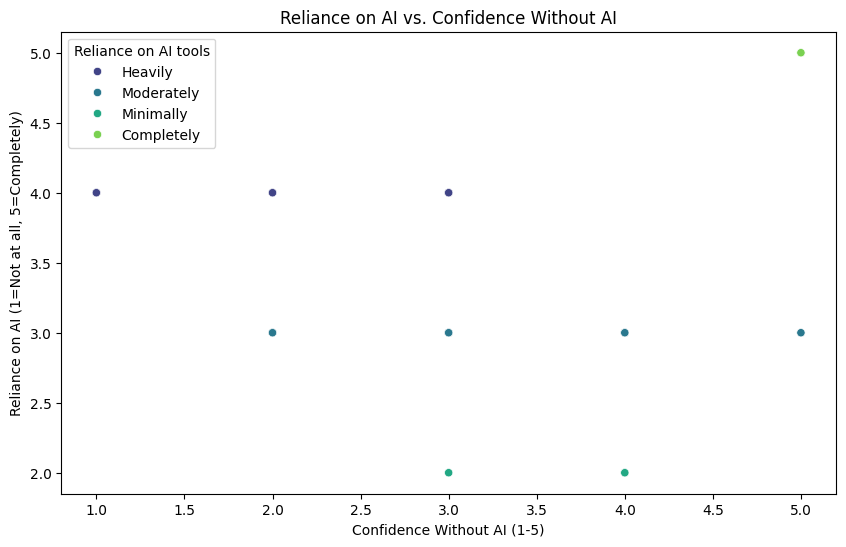

In [248]:





reliance_map = {
    'Not at all': 1,
    'Minimally': 2,
    'Moderately': 3,
    'Heavily': 4,
    'Completely': 5
}
df['Reliance_numeric'] = df['Reliance on AI tools'].map(reliance_map)

#scatter plot between reliance numeric and confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Confidence without AI', y='Reliance_numeric', hue='Reliance on AI tools', palette='viridis')
plt.title('Reliance on AI vs. Confidence Without AI')
plt.xlabel('Confidence Without AI (1-5)')
plt.ylabel('Reliance on AI (1=Not at all, 5=Completely)')
plt.show()


In [192]:
df.head()

,Gender,Frequency of use,percieved generative AI accuracy,Reliance on AI tools,Level of study,Creative tasks,Problem solving influence,Innovative solutions,Confidence without AI,Reliance_numeric,Innovation_numeric
0,Male,Always (everyday ),4,Heavily,Sophomore,4,4,Somewhat enhanced,3,4,4
1,Female,Always (everyday ),3,Heavily,Sophomore,4,4,Somewhat enhanced,2,4,4
2,Male,Always (everyday ),4,Moderately,Sophomore,4,5,Somewhat enhanced,3,3,4
3,Male,Always (everyday ),4,Heavily,Sophomore,4,5,Somewhat enhanced,1,4,4
4,Male,Always (everyday ),3,Moderately,Sophomore,2,4,Somewhat enhanced,2,3,4


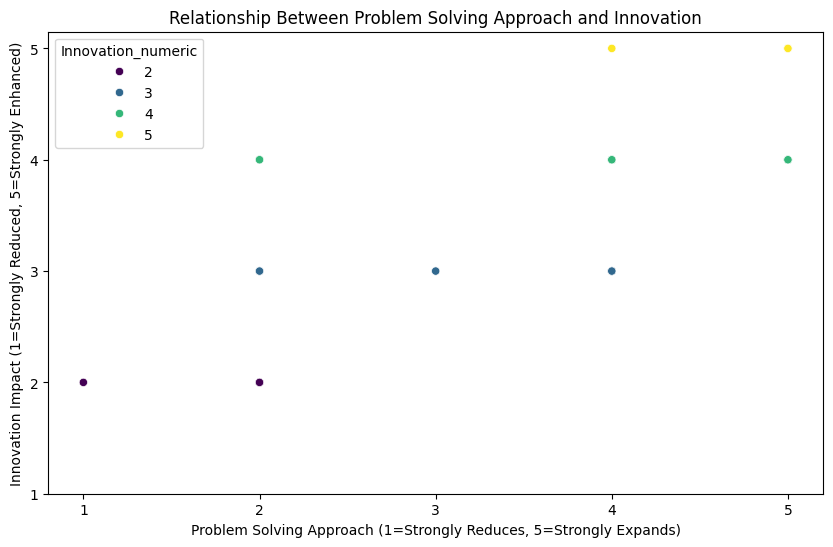

In [250]:
innovation_map = {
    'Strongly reduced': 1,
    'Somewhat reduced': 2,
    'No change': 3,
    'Somewhat enhanced': 4,
    'Strongly enhanced': 5
}
df['Innovation_numeric'] = df['Innovative solutions'].map(innovation_map)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Problem_solving_numeric', y='Innovation_numeric', hue='Innovation_numeric', palette='viridis')
plt.title('Relationship Between Problem Solving Approach and Innovation')
plt.xlabel('Problem Solving Approach (1=Strongly Reduces, 5=Strongly Expands)')
plt.ylabel('Innovation Impact (1=Strongly Reduced, 5=Strongly Enhanced)')
plt.xticks(range(1, 6))
plt.yticks(range(1, 6))
plt.show()

<Figure size 1000x600 with 0 Axes>

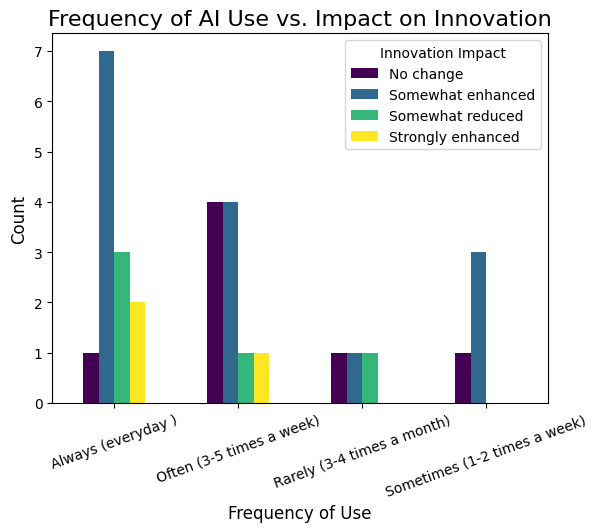

In [251]:
plt.figure(figsize=(10, 6))
freq_innovation = pd.crosstab(df['Frequency of use'], df['Innovative solutions'])
freq_innovation.plot(kind='bar', stacked=False, colormap='viridis')
plt.title('Frequency of AI Use vs. Impact on Innovation', fontsize=16)
plt.xlabel('Frequency of Use', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Innovation Impact')
plt.xticks(rotation=20)
plt.show()

In [252]:
frequency_map = {'Rarely (3-4 times a month)': 1, 'Sometimes (1-2 times a week)': 2,
                 'Often (3-5 times a week)': 3, 'Always (everyday )': 4}
df['Frequency_numeric'] = df['Frequency of use'].map(frequency_map)

In [255]:
avg_confidence = df['Confidence without AI'].mean()
avg_accuracy = df['percieved generative AI accuracy'].mean()
most_common_frequency = df['Frequency of use'].mode()[0]
most_common_reliance = df['Reliance on AI tools'].mode()[0]
most_common_problem_solving = df['Problem solving influence'].mode()[0]
most_common_innovation = df['Innovative solutions'].mode()[0]

corr_rel_conf = df['Reliance_numeric'].corr(df['Confidence without AI'])
corr_prob_innov = df['Problem_solving_numeric'].corr(df['Innovation_numeric'])
corr_freq_innov = df['Frequency_numeric'].corr(df['Innovation_numeric'])

print("\nKey Findings:")
print(f"Average Confidence Without AI: {avg_confidence:.2f}")
print(f"Average Perceived AI Accuracy: {avg_accuracy:.2f}")
print(f"Most Common Frequency of Use: {most_common_frequency}")
print(f"Most Common Reliance Level: {most_common_reliance}")
print(f"Most Common Problem Solving Impact: {most_common_problem_solving}")
print(f"Most Common Innovation Impact: {most_common_innovation}")
print(f"Correlation between Reliance and Confidence: {corr_rel_conf:.2f}")
print(f"Correlation between Problem Solving Approach and Innovation: {corr_prob_innov:.2f}")
print(f"Correlation between Frequency of Use and Innovation: {corr_freq_innov:.2f}")


Key Findings:
Average Confidence Without AI: 2.93
Average Perceived AI Accuracy: 3.53
Most Common Frequency of Use: Always (everyday )
Most Common Reliance Level: Moderately
Most Common Problem Solving Impact: Somewhat Expanded (AI gives hints, but I still think independently)
Most Common Innovation Impact: Somewhat enhanced
Correlation between Reliance and Confidence: -0.33
Correlation between Problem Solving Approach and Innovation: 0.72
Correlation between Frequency of Use and Innovation: 0.13
